In [3]:
# 1. SETUP & IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')


## **Data Loading**

In [4]:
df1=pd.read_csv('/content/fear_greed_index.csv')
df2=pd.read_csv('/content/historical_data.csv')

In [5]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
df1.shape

(2644, 4)

In [7]:
df1.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [8]:
for col in df1.columns:
    print(f"{col} → {df1[col].nunique()} unique values")


timestamp → 2644 unique values
value → 90 unique values
classification → 5 unique values
date → 2644 unique values


In [9]:
for col in df1.columns:
    print(f"\n--- {col} ---")
    print(df1[col].value_counts(dropna=False))  # dropna=False to include NaNs



--- timestamp ---
timestamp
1746163800    1
1517463000    1
1517549400    1
1517635800    1
1744781400    1
             ..
1518154200    1
1518067800    1
1517981400    1
1517895000    1
1517808600    1
Name: count, Length: 2644, dtype: int64

--- value ---
value
50    70
24    61
27    60
72    60
20    58
      ..
87     4
89     3
7      2
6      2
5      1
Name: count, Length: 90, dtype: int64

--- classification ---
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

--- date ---
date
2025-05-02    1
2018-02-01    1
2018-02-02    1
2018-02-03    1
2025-04-16    1
             ..
2018-02-09    1
2018-02-08    1
2018-02-07    1
2018-02-06    1
2018-02-05    1
Name: count, Length: 2644, dtype: int64


In [10]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
df2.shape

(211224, 16)

In [12]:
df2.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [13]:
for col in df2.columns:
    print(f"{col} → {df2[col].nunique()} unique values")


Account → 32 unique values
Coin → 246 unique values
Execution Price → 60162 unique values
Size Tokens → 59304 unique values
Size USD → 118493 unique values
Side → 2 unique values
Timestamp IST → 27977 unique values
Start Position → 196923 unique values
Direction → 12 unique values
Closed PnL → 90720 unique values
Transaction Hash → 101184 unique values
Order ID → 50555 unique values
Crossed → 2 unique values
Fee → 138802 unique values
Trade ID → 2810 unique values
Timestamp → 7 unique values


In [14]:
for col in df2.columns:
    print(f"\n--- {col} ---")
    print(df2[col].value_counts(dropna=False))  # dropna=False to include NaNs



--- Account ---
Account
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864    21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    15605
0x8477e447846c758f5a675856001ea72298fd9cb5    14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    13311
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4     9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85     8519
0x4f93fead39b70a1824f981a54d4e55b278e9f760     7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     7280
0xb899e522b5715391ae1d4f137653e7906c5e2115     4838
0x8170715b3b381dffb7062c0298972d4727a0a63b     4601
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4     4356
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x271b280974205ca63b716753467d5a371de622ab     3809
0x39cef799f8b69da1995852eea189df24eb5cae3c     3589
0x2c229d22b100a7beb69122eed721cee9b24011dd     3239
0x92f17e8d81a944691c10e753af1b1baae1a2c

#  Data Cleaning & Preprocessing

In [15]:
# --- 3.1. SENTIMENT DATA CLEANING (df1) ---

# Ensure date is datetime type
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Clean text labels for classification
df1['classification'] = df1['classification'].astype(str).str.strip().str.title()

# If timestamp column exists, convert to datetime (from epoch seconds)
if 'timestamp' in df1.columns:
    df1['timestamp'] = pd.to_datetime(df1['timestamp'], unit='s', errors='coerce')

# Remove duplicates if any (keep the first occurrence)
df1 = df1.drop_duplicates()

# Check missing values for critical columns
print("Sentiment data missing values:")
print(df1[['date', 'classification', 'value']].isnull().sum())


Sentiment data missing values:
date              0
classification    0
value             0
dtype: int64


In [16]:
# --- 3.2. TRADER DATA CLEANING (df2) ---

# Convert 'Timestamp' (in milliseconds) to date
df2['date'] = pd.to_datetime(df2['Timestamp'], unit='ms', errors='coerce').dt.date

# Convert 'Timestamp IST' to date if you want local analysis as well
if 'Timestamp IST' in df2.columns:
    df2['date_ist'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date

# Force numeric types for important trade columns
for col in ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']:
    if col in df2.columns:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [17]:
# Standardize categorical columns
df2['Side'] = df2['Side'].astype(str).str.strip().str.upper()
if 'Direction' in df2.columns:
    df2['Direction'] = df2['Direction'].astype(str).str.strip().str.title()
if 'Coin' in df2.columns:
    df2['Coin'] = df2['Coin'].astype(str).str.upper().str.strip()
if 'Account' in df2.columns:
    df2['Account'] = df2['Account'].astype(str).str.lower().str.strip()

In [18]:
# Boolean columns (ensure True/False not string or int)
if 'Crossed' in df2.columns:
    df2['Crossed'] = df2['Crossed'].apply(lambda x: True if str(x).strip().lower() == 'true' else False if str(x).strip().lower() == 'false' else np.nan)

# Large identifier columns as string
for col in ['Trade ID', 'Order ID', 'Transaction Hash']:
    if col in df2.columns:
        df2[col] = df2[col].astype(str)

# Remove rows with missing critical values (optional, or fill with defaults)
critical_cols = ['Size USD', 'Closed PnL', 'date']
df2 = df2.dropna(subset=[col for col in critical_cols if col in df2.columns])

In [19]:
# Remove duplicate rows
df2 = df2.drop_duplicates()

# Print missing values summary for df2
print("Trader data missing values:")
print(df2[['date', 'Size USD', 'Closed PnL']].isnull().sum())

# Optional: Outlier check (optional, can flag if needed for EDA)
print("Trader numeric columns summary (after cleaning):")
print(df2[['Execution Price', 'Size USD', 'Closed PnL', 'Fee']].describe())

# Optional: Reset index after cleaning
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

print("\nFinished cleaning! Ready for EDA and merging.")

Trader data missing values:
date          0
Size USD      0
Closed PnL    0
dtype: int64
Trader numeric columns summary (after cleaning):
       Execution Price      Size USD     Closed PnL            Fee
count    211224.000000  2.112240e+05  211224.000000  211224.000000
mean      11414.723350  5.639451e+03      48.749001       1.163967
std       29447.654868  3.657514e+04     919.164828       6.758854
min           0.000005  0.000000e+00 -117990.104100      -1.175712
25%           4.854700  1.937900e+02       0.000000       0.016121
50%          18.280000  5.970450e+02       0.000000       0.089578
75%         101.580000  2.058960e+03       5.792797       0.393811
max      109004.000000  3.921431e+06  135329.090100     837.471593

Finished cleaning! Ready for EDA and merging.


# Merge Datasets

In [20]:
df1['date'] = df1['date'].dt.date
merged = pd.merge(df2, df1[['date', 'classification', 'value']], left_on='date', right_on='date', how='left')
print('Merged shape:', merged.shape)
display(merged.head())


Merged shape: (211224, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,date_ist,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000.0,1.730000e+12,2024-10-27,2024-12-02,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000.0,1.730000e+12,2024-10-27,2024-12-02,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000.0,1.730000e+12,2024-10-27,2024-12-02,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000.0,1.730000e+12,2024-10-27,2024-12-02,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000.0,1.730000e+12,2024-10-27,2024-12-02,Greed,74.0


# Exploratory Data Analysis (EDA)

In [23]:
# EDA for Sentiment Data (df1)
print("==== SENTIMENT DATA OVERVIEW ====")
print("df1 shape:", df1.shape)
print("Sentiment class distribution:")
print(df1['classification'].value_counts(dropna=False))
print("Sentiment value summary:")
print(df1['value'].describe())
print("Missing values:")
print(df1.isnull().sum())


==== SENTIMENT DATA OVERVIEW ====
df1 shape: (2644, 4)
Sentiment class distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64
Sentiment value summary:
count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64
Missing values:
timestamp         0
value             0
classification    0
date              0
dtype: int64


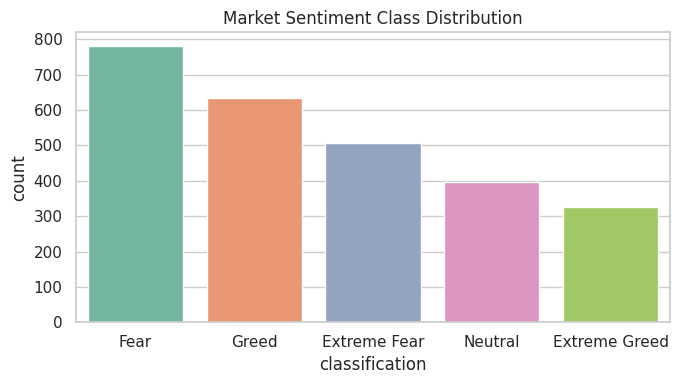

In [24]:
# Plot sentiment class counts
plt.figure(figsize=(7,4))
sns.countplot(x='classification', data=df1, order=df1['classification'].value_counts().index, palette='Set2')
plt.title("Market Sentiment Class Distribution")
plt.tight_layout()
plt.show()

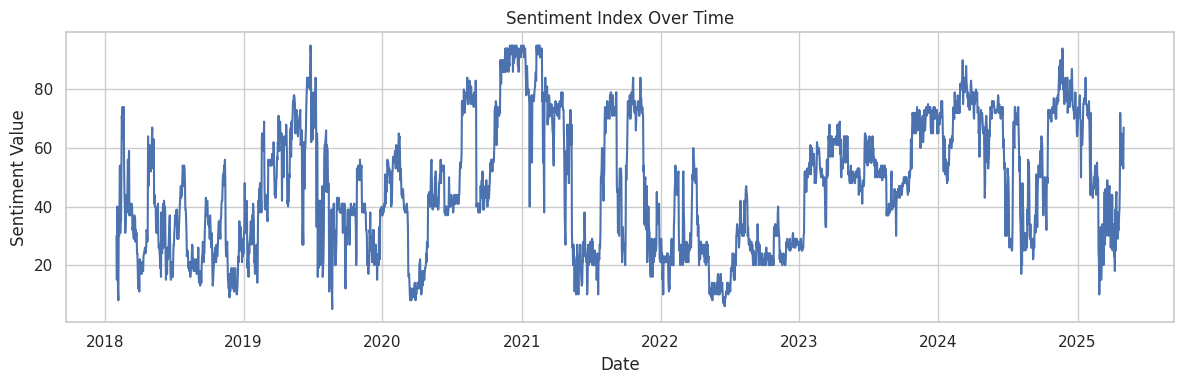

In [25]:
# Time series plot of sentiment value
plt.figure(figsize=(12,4))
plt.plot(df1['date'], df1['value'])
plt.title("Sentiment Index Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Value")
plt.tight_layout()
plt.show()

In [26]:
# EDA for Trading Data (df2)
print("\n==== TRADER DATA OVERVIEW ====")
print("df2 shape:", df2.shape)
print("Trade side distribution:")
print(df2['Side'].value_counts(dropna=False))
print("Top coins traded:")
print(df2['Coin'].value_counts().head())
print("Closed PnL stats:")
print(df2['Closed PnL'].describe())
print("Missing values:")
print(df2.isnull().sum())
print("Top accounts by volume:")
print(df2.groupby('Account')['Size USD'].sum().sort_values(ascending=False).head())


==== TRADER DATA OVERVIEW ====
df2 shape: (211224, 18)
Trade side distribution:
Side
SELL    108528
BUY     102696
Name: count, dtype: int64
Top coins traded:
Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
Name: count, dtype: int64
Closed PnL stats:
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64
Missing values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
date_ist            0
dtype: int64
Top accounts by volume:
Account
0x513b8629fe877bb581bf244e326a047b249c4ff1    4

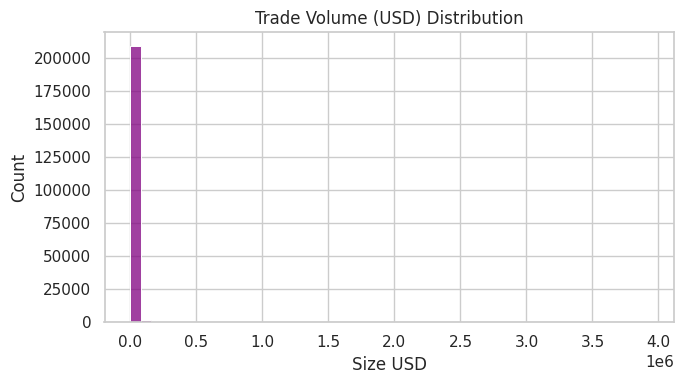

In [27]:
# Plot trade volume distribution
plt.figure(figsize=(7,4))
sns.histplot(df2['Size USD'], bins=50, color='purple')
plt.title("Trade Volume (USD) Distribution")
plt.tight_layout()
plt.show()

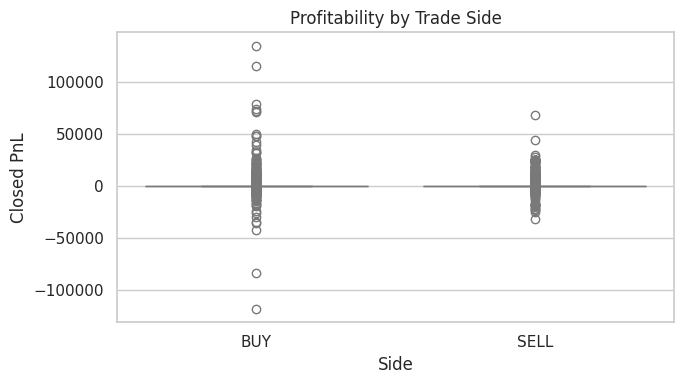

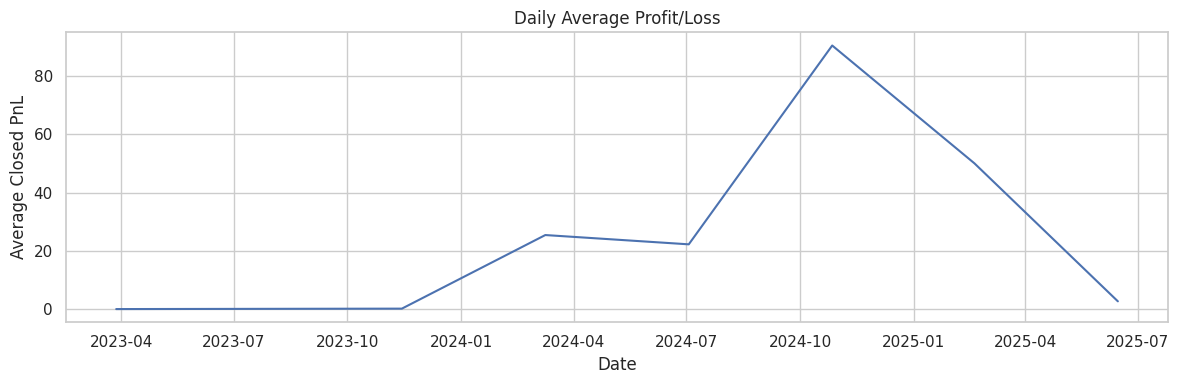

In [28]:
# Boxplot: Profitability by side
plt.figure(figsize=(7,4))
sns.boxplot(x='Side', y='Closed PnL', data=df2, palette='coolwarm')
plt.title("Profitability by Trade Side")
plt.tight_layout()
plt.show()

# Time series of average PnL per day
avg_daily_pnl = df2.groupby('date')['Closed PnL'].mean()
plt.figure(figsize=(12,4))
plt.plot(avg_daily_pnl.index, avg_daily_pnl.values)
plt.title('Daily Average Profit/Loss')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()

# **Core Assignment Analysis**

**Aggregated Metrics**

In [34]:
grouped = merged.groupby('classification').agg(
    n_trades = ('Closed PnL', 'count'),
    mean_pnl = ('Closed PnL', 'mean'),
    median_pnl = ('Closed PnL', 'median'),
    std_pnl = ('Closed PnL', 'std'),
    total_volume = ('Size USD', 'sum'),
    avg_volume = ('Size USD', 'mean'),
    mean_fee = ('Fee', 'mean'),
)
grouped.reset_index(inplace=True)
display(grouped)


,classification,n_trades,mean_pnl,median_pnl,std_pnl,total_volume,avg_volume,mean_fee
0,Extreme Greed,6962,25.418772,0.0,306.166937,3.940677e+07,5660.265764,0.978567
1,Fear,133871,50.047622,0.0,909.121796,7.041585e+08,5259.977837,1.083267
2,Greed,36289,87.894859,0.0,1148.343968,1.155037e+08,3182.883845,0.670562
3,Neutral,7141,22.229713,0.0,633.704815,2.184323e+07,3058.848110,1.224461


**Leverage analysis**




In [37]:
# Average leverage by sentiment
if 'Leverage' in merged.columns:
    grouped['avg_leverage'] = merged.groupby('classification')['Leverage'].mean().values
    grouped['median_leverage'] = merged.groupby('classification')['Leverage'].median().values

# Win rate (profitable trade %)
grouped['win_rate_%'] = merged.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean()*100).values

# Loss rate
grouped['loss_rate_%'] = merged.groupby('classification')['Closed PnL'].apply(lambda x: (x < 0).mean()*100).values


In [38]:
# Proportion of BUY/SELL
side_summary = pd.crosstab(merged['classification'], merged['Side'], normalize='index') * 100
print('\nBUY/SELL % by sentiment:\n', side_summary)



BUY/SELL % by sentiment:
 Side                  BUY       SELL
classification                      
Extreme Greed   48.419994  51.580006
Fear            49.361699  50.638301
Greed           42.494971  57.505029
Neutral         49.082762  50.917238


In [39]:
# Trades with PnL > 99th percentile or < 1st percentile, by sentiment
big_win_thresh = merged['Closed PnL'].quantile(0.99)
big_loss_thresh = merged['Closed PnL'].quantile(0.01)
big_wins = merged[merged['Closed PnL'] >= big_win_thresh].groupby('classification').size()
big_losses = merged[merged['Closed PnL'] <= big_loss_thresh].groupby('classification').size()


In [40]:
from scipy.stats import ttest_ind
fear_pnl = merged[merged['classification'] == 'Fear']['Closed PnL'].dropna()
greed_pnl = merged[merged['classification'] == 'Greed']['Closed PnL'].dropna()
ttest_result = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print("\nT-test Fear vs Greed PnL means:", ttest_result)



T-test Fear vs Greed PnL means: TtestResult(statistic=np.float64(-5.804644944972441), pvalue=np.float64(6.489683964771416e-09), df=np.float64(49280.40006430801))


In [41]:
# After running the t-test...
print("T-Test: Closed PnL in 'Fear' vs 'Greed' markets")
print("="*50)
print(f"{'t-statistic:':20} {ttest_result.statistic:.3f}")
print(f"{'p-value:':20} {ttest_result.pvalue:.2e}")
print(f"{'Degrees of Freedom:':20} {ttest_result.df:.0f}")
print("-"*50)
if ttest_result.pvalue < 0.001:
    print("Result: SIGNIFICANT difference in mean profitability.")
    print("Average profitability during 'Fear' periods is LOWER than 'Greed' periods.")
else:
    print("Result: No significant difference detected.")


T-Test: Closed PnL in 'Fear' vs 'Greed' markets
t-statistic:         -5.805
p-value:             6.49e-09
Degrees of Freedom:  49280
--------------------------------------------------
Result: SIGNIFICANT difference in mean profitability.
Average profitability during 'Fear' periods is LOWER than 'Greed' periods.


# Visualizations

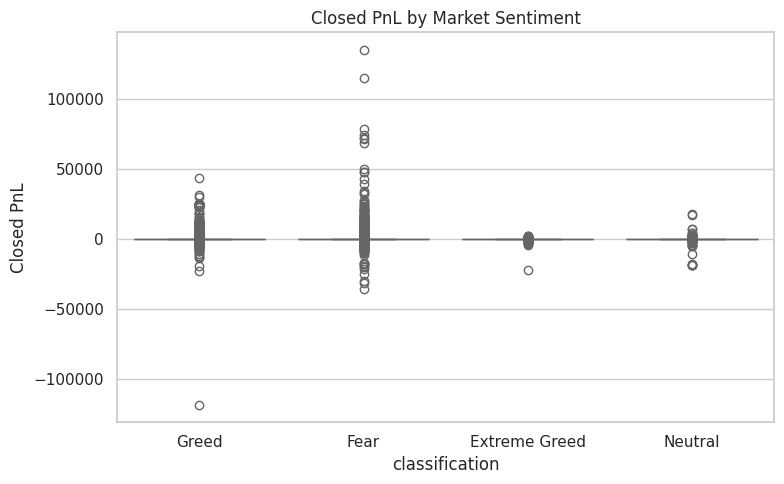

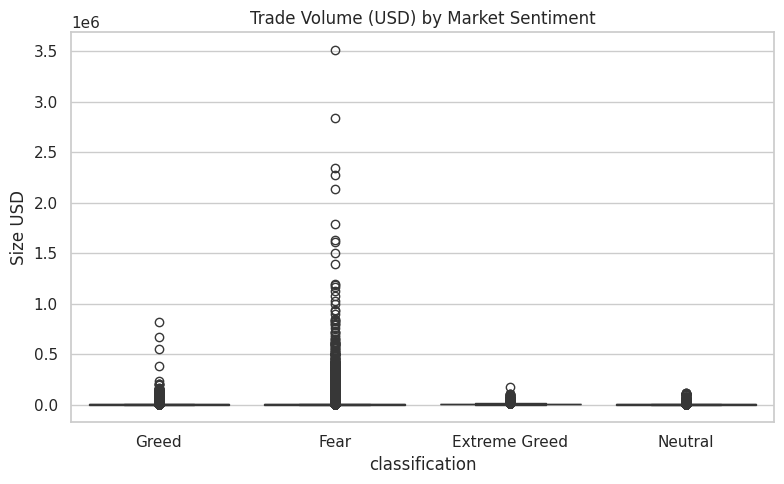

In [42]:
import os
os.makedirs('/content/outputs', exist_ok=True)

# Boxplot - Profitability by Market Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged, palette='coolwarm')
plt.title('Closed PnL by Market Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/pnl_by_sentiment.png')
plt.show()

# Boxplot - Trade Volume by Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Size USD', data=merged, palette='viridis')
plt.title('Trade Volume (USD) by Market Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/volume_by_sentiment.png')
plt.show()


# Trade Side Distribution

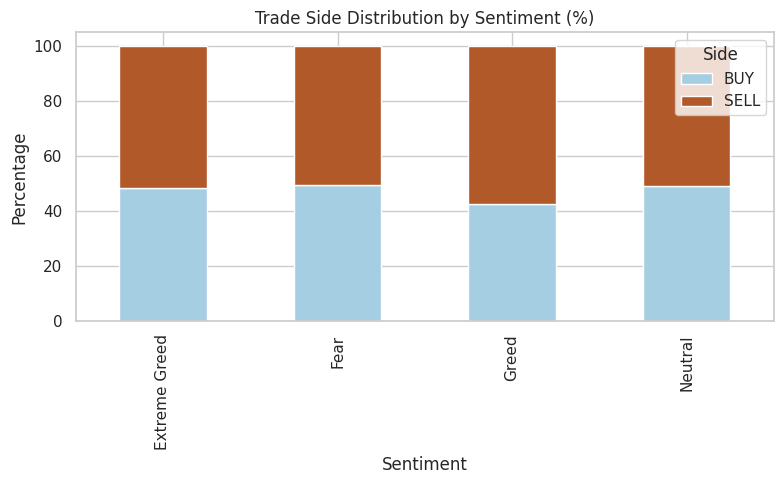

In [43]:
trade_side = pd.crosstab(merged['classification'], merged['Side'], normalize='index') * 100
trade_side[['BUY', 'SELL']].plot(kind='bar', stacked=True, colormap='Paired', figsize=(8,5))
plt.title('Trade Side Distribution by Sentiment (%)')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/buy_sell_distribution_by_sentiment.png')
plt.show()


***Per-Account (Top Traders) Analysis***

,Account,classification,total_pnl,total_volume,n_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1.927736e+06,5.485463e+07,3356
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,-3.275059e+05,6.842632e+06,462
2,0x271b280974205ca63b716753467d5a371de622ab,Fear,2.997093e+04,1.231072e+07,1136
3,0x271b280974205ca63b716753467d5a371de622ab,Greed,1.793160e+03,1.597083e+05,5
4,0x271b280974205ca63b716753467d5a371de622ab,Neutral,-1.000000e+00,3.035100e+04,5
5,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Fear,6.133278e+05,3.424772e+07,3806
6,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Greed,6.107617e+04,2.769685e+06,328
7,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Extreme Greed,-7.919471e+03,4.540453e+06,730
8,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Fear,2.239684e+05,7.649005e+07,3737
9,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Greed,1.112305e+05,3.345572e+07,1703


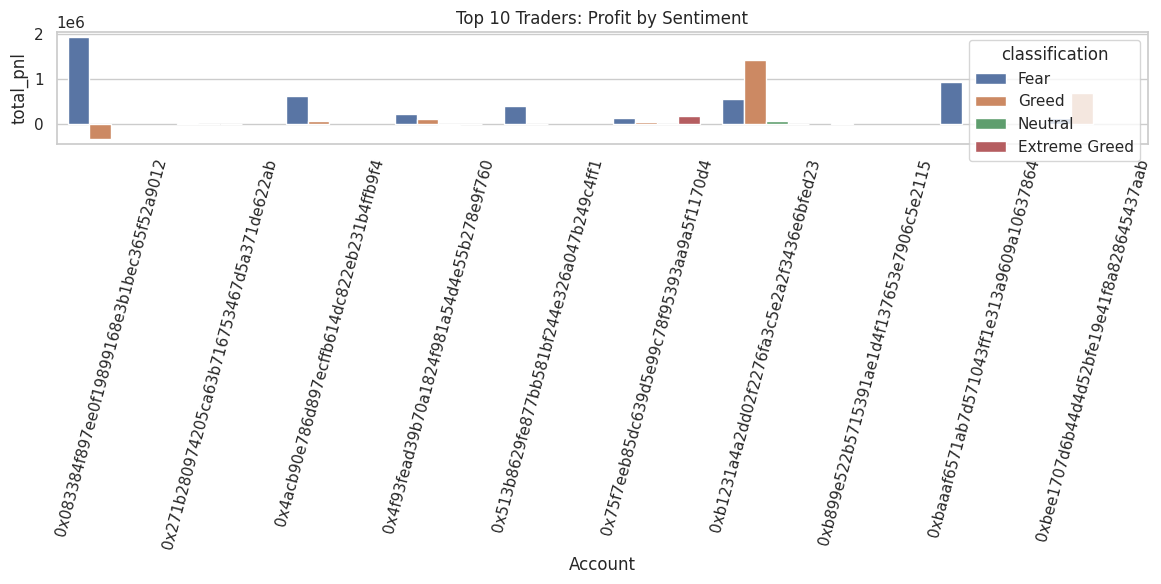

In [44]:
# Top 10 accounts by total traded volume
top_accounts = merged.groupby('Account')['Size USD'].sum().sort_values(ascending=False).head(10).index
account_grouped = merged[merged['Account'].isin(top_accounts)].groupby(['Account', 'classification']).agg(
    total_pnl = ('Closed PnL', 'sum'),
    total_volume = ('Size USD', 'sum'),
    n_trades = ('Closed PnL', 'count')
).reset_index()
display(account_grouped)

# (Optional chart)
plt.figure(figsize=(12,6))
sns.barplot(x='Account', y='total_pnl', hue='classification', data=account_grouped)
plt.title('Top 10 Traders: Profit by Sentiment')
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('/content/outputs/top_traders_profit_by_sentiment.png')
plt.show()


*** Per-Coin Analysis***

,Coin,classification,mean_pnl,total_volume
0,@107,Fear,13.835667,2.361753e+07
1,@107,Greed,189.038983,3.017330e+07
2,BTC,Extreme Greed,-5.412420,1.157254e+07
3,BTC,Fear,34.148555,3.503168e+08
4,BTC,Greed,45.483076,3.836058e+07
5,BTC,Neutral,48.319358,1.375887e+06
6,ETH,Extreme Greed,-2.407541,1.511749e+07
7,ETH,Fear,269.038782,6.512208e+07
8,ETH,Greed,12.307966,1.845125e+07
9,ETH,Neutral,-20.976519,1.637599e+07


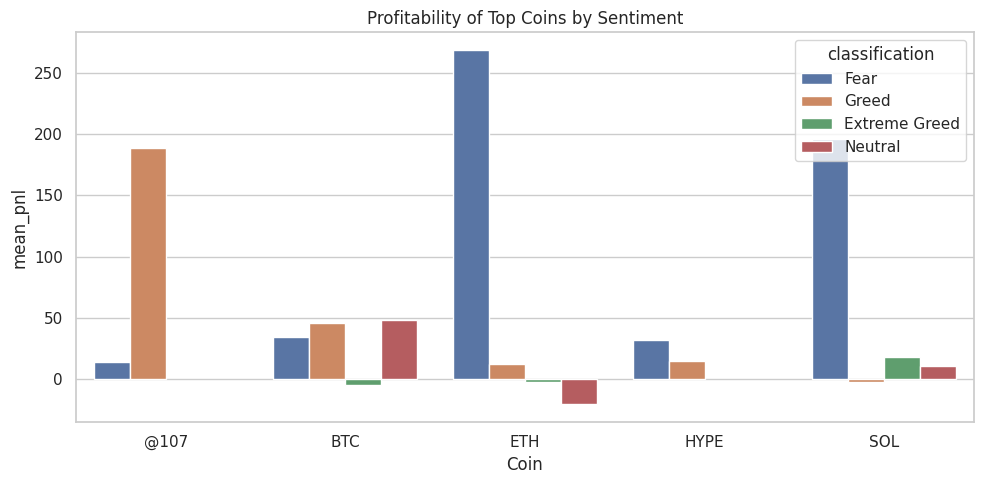

In [45]:
# Top 5 coins
top_coins = merged['Coin'].value_counts().head(5).index
coin_grouped = merged[merged['Coin'].isin(top_coins)].groupby(['Coin', 'classification']).agg(
    mean_pnl = ('Closed PnL', 'mean'),
    total_volume = ('Size USD', 'sum')
).reset_index()
display(coin_grouped)

# (Optional chart)
plt.figure(figsize=(10,5))
sns.barplot(x='Coin', y='mean_pnl', hue='classification', data=coin_grouped)
plt.title('Profitability of Top Coins by Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/top_coins_pnl_by_sentiment.png')
plt.show()


***Time Series Trends***

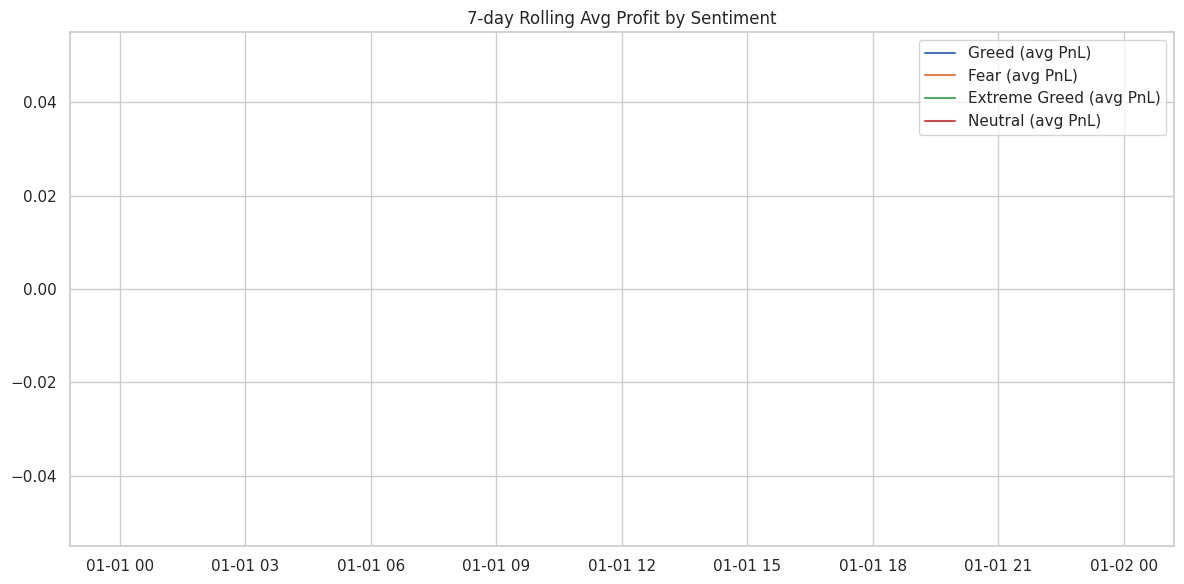

In [46]:
# Daily average profit and volume; rolling mean (7d) for visualization
timeseries = merged.groupby(['date', 'classification']).agg(
    avg_pnl = ('Closed PnL', 'mean'),
    total_volume = ('Size USD', 'sum'),
    n_trades = ('Closed PnL', 'count')
).reset_index()

plt.figure(figsize=(12,6))
for cl in merged['classification'].dropna().unique():
    ts = timeseries[timeseries['classification']==cl].sort_values('date')
    plt.plot(ts['date'], ts['avg_pnl'].rolling(7).mean(), label=f'{cl} (avg PnL)')
plt.title('7-day Rolling Avg Profit by Sentiment')
plt.legend()
plt.tight_layout()
plt.savefig('/content/outputs/rolling_avg_pnl_by_sentiment.png')
plt.show()


***Correlation Analysis***

In [47]:
corr = merged[['Closed PnL', 'value']].corr()
print('Correlation between Sentiment Value and Closed PnL:\n', corr)


Correlation between Sentiment Value and Closed PnL:
             Closed PnL     value
Closed PnL    1.000000  0.011132
value         0.011132  1.000000


*** Insights Summary (for report and presentation)***

In [48]:
for idx, row in grouped.iterrows():
    print(f"{row['classification']}: n={int(row.n_trades)} | mean PnL={row.mean_pnl:.3f} | total_vol=${row.total_volume:,.0f}")
print(f"\nCorrelation between sentiment value and profit: {corr.loc['Closed PnL','value']:.4f}")


Extreme Greed: n=6962 | mean PnL=25.419 | total_vol=$39,406,770
Fear: n=133871 | mean PnL=50.048 | total_vol=$704,158,493
Greed: n=36289 | mean PnL=87.895 | total_vol=$115,503,672
Neutral: n=7141 | mean PnL=22.230 | total_vol=$21,843,234

Correlation between sentiment value and profit: 0.0111


In [49]:
output_csv_path = '/content/outputs/aggregated_trading_metrics_by_sentiment.csv'
grouped.to_csv(output_csv_path, index=False)
print(f"Saved output CSV: {output_csv_path}")


from google.colab import files
files.download(output_csv_path)


Saved output CSV: /content/outputs/aggregated_trading_metrics_by_sentiment.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>